# Reading NIH data file
This is an example implementation of reading the `nispuf14.dat` file.

In [2]:
import pandas as pd

dfAfrica = pd.read_csv("africa.csv")
dfAmericas = pd.read_csv("americas.csv")
dfEMed = pd.read_csv("mediterranean.csv")
dfEurope = pd.read_csv("europe.csv")
dfSEAsia = pd.read_csv("asia.csv")
dfWPacific = pd.read_csv("pacific.csv")

df = [dfAfrica, dfAmericas, dfEMed, dfEurope, dfSEAsia, dfWPacific]

result = pd.concat(df)

print result.head()

               GHO PUBLISHSTATE  YEAR REGION    AGEGROUP   SEX  Display Value  \
0  LIFE_0000000033    PUBLISHED  1990    AFR  AGE100PLUS  BTSX           60.0   
1  LIFE_0000000035    PUBLISHED  2013    AFR    AGE85-89  BTSX            4.1   
2  LIFE_0000000035    PUBLISHED  2000    AFR    AGE55-59  BTSX           18.8   
3  LIFE_0000000032    PUBLISHED  2012    AFR    AGE45-49  FMLE         3411.0   
4  LIFE_0000000035    PUBLISHED  1990    AFR    AGE25-29   MLE           38.8   

      Numeric  Low  High  Comments  
0    60.01235  NaN   NaN       NaN  
1     4.14085  NaN   NaN       NaN  
2    18.76440  NaN   NaN       NaN  
3  3410.96100  NaN   NaN       NaN  
4    38.79806  NaN   NaN       NaN  


We got data. Now need to fix the weird symbols in Age column.

In [3]:
def cleanData(data):
    data.AGEGROUP.replace(("AGE100PLUS", "AGE95-99", "AGE90-94", "AGE85-89", 
                             "AGE80-84", "AGE75-79", "AGE70-74", "AGE65-69", 
                             "AGE60-64", "AGE55-59", "AGE50-54", "AGE45-49", 
                             "AGE40-44", "AGE35-39", "AGE30-34", "AGE25-29", 
                             "AGE20-24", "AGE15-19", "AGE10-14", "AGE5-9", 
                             "AGE1-4", "AGELT1"), 
                          (100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 
                             45, 40, 35, 30, 25, 20, 15, 10, 5, 1, 0.5), 
                          inplace = True)
    
    data.SEX.replace(("BTSX", "FMLE", "MLE"), (2, 1, 0), inplace = True)
    
    # V not a continuous value, just for ease of referencing this column
    data.GHO.replace(("LIFE_0000000029", "LIFE_0000000030", "LIFE_0000000031", 
                      "LIFE_0000000032", "LIFE_0000000033", "LIFE_0000000034",
                      "LIFE_0000000035"),
                     (29, 30, 31, 32, 33, 34, 35), inplace = True)
    
    data.drop(["PUBLISHSTATE", "Low", "High", "Comments", "Display Value"], 
              inplace = True, axis = 1)

Meanings of values in GHO column:

29  nMx - age-specific death rate between ages x and x+n

30  nqx - probability of dying between ages x and x+n

31  lx - number of people left alive at age x

32  ndx - number of people dying between ages x and x+n

33  nLx - person-years lived between ages x and x+n

34  Tx - person-years lived above age x

35  ex - expectation of life at age x

In [4]:
cleanData(result)
print result.head()

   GHO  YEAR REGION  AGEGROUP  SEX     Numeric
0   33  1990    AFR       100    2    60.01235
1   35  2013    AFR        85    2     4.14085
2   35  2000    AFR        55    2    18.76440
3   32  2012    AFR        45    1  3410.96100
4   35  1990    AFR        25    0    38.79806


Now let's graph some stuff.

In [5]:
import matplotlib as mpl
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Mackenzie is interested in trends across years by region. Philip is interested in comparing metric 31 and 32.

10      95.0
13      10.0
40       0.5
52      45.0
54      35.0
57       1.0
67      10.0
68      25.0
70      85.0
80      50.0
91      90.0
92      75.0
102     15.0
116     85.0
123     55.0
138     30.0
140     95.0
146     15.0
147     65.0
150     60.0
159     70.0
163     10.0
164     85.0
177     40.0
179     25.0
181     65.0
190     95.0
195     50.0
203     10.0
208     55.0
        ... 
1645    40.0
1646    85.0
1653     0.5
1678    95.0
1687    90.0
1700    60.0
1701     0.5
1702    75.0
1714    10.0
1722    80.0
1724    35.0
1736    90.0
1746     1.0
1753    60.0
1765     5.0
1766    85.0
1773    80.0
1775    95.0
1785    50.0
1793    30.0
1798    55.0
1799    25.0
1800    10.0
1803    40.0
1808    10.0
1816    30.0
1827    15.0
1833    90.0
1842     1.0
1847    60.0
Name: AGEGROUP, dtype: float64
10      AFR
13      AFR
40      AFR
52      AFR
54      AFR
57      AFR
67      AFR
68      AFR
70      AFR
80      AFR
91      AFR
92      AFR
102     AFR
116     AFR
123     

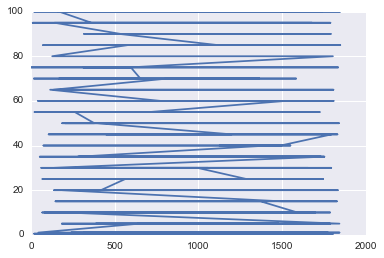

In [7]:
# ts = result.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
result.groupby(['REGION', 'YEAR', 'GHO', 'AGEGROUP', 'SEX'])

alive = result[result.GHO == 31]
bothAlives = alive[alive.SEX == 2]

sortedExpec = bothAlives.AGEGROUP.sort_values()
plt.plot(sortedExpec)

print result[result.GHO == 31].AGEGROUP
print result[result.GHO == 31].REGION

# plt.plot(result[result.GHO == 31].Numeric)